In [1]:
import scipy.stats as scs
import numpy as np
import pandas as pd

# Sandwiches

In [2]:
meat = np.random.choice(['turkey','ham','roast beef'], p=[0.6,0.1,0.3], size=12)
bread = np.random.choice(['white','wheat','dutch crunch'], p=[0.4,0.4,0.2], size=12)
cheese = np.random.choice(['Nope', 'Provolone', 'Cheddar'], p=[0.2, 0.3, 0.5], size=12)
mustard = np.random.choice([True, False], p=[0.75, 0.25], size=12)
sandwiches = pd.DataFrame(data={'meat':meat, 'bread':bread, 'cheese':cheese, 'mustard?':mustard})

In [3]:
sandwiches

,bread,cheese,meat,mustard?
0,dutch crunch,Cheddar,turkey,True
1,wheat,Provolone,roast beef,True
2,white,Cheddar,roast beef,True
3,dutch crunch,Provolone,ham,True
4,wheat,Provolone,turkey,True
5,white,Nope,turkey,True
6,dutch crunch,Nope,ham,True
7,white,Cheddar,roast beef,True
8,dutch crunch,Provolone,turkey,True
9,white,Cheddar,roast beef,False


In [4]:
sandwiches[sandwiches['cheese']=='Cheddar'].count()

bread       5
cheese      5
meat        5
mustard?    5
dtype: int64

In [5]:
sandwiches[sandwiches['bread'] == 'white'].count()

bread       4
cheese      4
meat        4
mustard?    4
dtype: int64

In [6]:
sandwiches[sandwiches['bread'] == 'white']

,bread,cheese,meat,mustard?
2,white,Cheddar,roast beef,True
5,white,Nope,turkey,True
7,white,Cheddar,roast beef,True
9,white,Cheddar,roast beef,False


In [7]:
sandwiches[(sandwiches['bread'] == 'white') & (sandwiches['cheese']=='Cheddar')]

,bread,cheese,meat,mustard?
2,white,Cheddar,roast beef,True
7,white,Cheddar,roast beef,True
9,white,Cheddar,roast beef,False


In [8]:
sandwiches[(sandwiches['bread'] == 'white') | (sandwiches['cheese']=='Cheddar')]

,bread,cheese,meat,mustard?
0,dutch crunch,Cheddar,turkey,True
2,white,Cheddar,roast beef,True
5,white,Nope,turkey,True
7,white,Cheddar,roast beef,True
9,white,Cheddar,roast beef,False
11,wheat,Cheddar,turkey,True


In [9]:
sandwiches[(sandwiches['bread'] == 'white') | (sandwiches['cheese']=='Cheddar')].count()

bread       6
cheese      6
meat        6
mustard?    6
dtype: int64

In [10]:
sandwiches['soggy'] = [True]*6 + [False]*6

In [11]:
sandwiches

,bread,cheese,meat,mustard?,soggy
0,dutch crunch,Cheddar,turkey,True,True
1,wheat,Provolone,roast beef,True,True
2,white,Cheddar,roast beef,True,True
3,dutch crunch,Provolone,ham,True,True
4,wheat,Provolone,turkey,True,True
5,white,Nope,turkey,True,True
6,dutch crunch,Nope,ham,True,False
7,white,Cheddar,roast beef,True,False
8,dutch crunch,Provolone,turkey,True,False
9,white,Cheddar,roast beef,False,False


# Horses & Dogs

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [13]:
np.random.seed(216)

In [14]:
horse_wt = scs.distributions.norm(100,25).rvs(size=12)
dog_wt = scs.distributions.norm(60,10).rvs(size=12)
horse_color = np.random.choice(['white', 'black', 'brown'], p=[0.1, 0.3, 0.6], size=12)
dog_color = np.random.choice(['white', 'black', 'brown'], p=[0.4, 0.3, 0.3], size=12)

In [15]:
horse_ht = 0.05*horse_wt + scs.distributions.norm(0,1).rvs(size=12)
dog_ht = 0.02*dog_wt + scs.distributions.norm(0,1).rvs(size=12)

In [16]:
df_horse = pd.DataFrame(data={'weight':horse_wt, 'color':horse_color, 'height':horse_ht})
df_dog = pd.DataFrame(data={'weight':dog_wt, 'color':dog_color, 'height':dog_ht})

df_horse['animal'] = 'horse'
df_dog['animal'] = 'dog'

df = pd.concat([df_horse, df_dog]).sample(frac=1).reset_index(drop=True)

In [17]:
df.head()

,color,height,weight,animal
0,black,1.975001,65.428189,dog
1,brown,2.234386,46.541458,horse
2,brown,2.480195,65.980122,dog
3,white,5.621873,84.139520,horse
4,black,2.043669,58.688497,dog


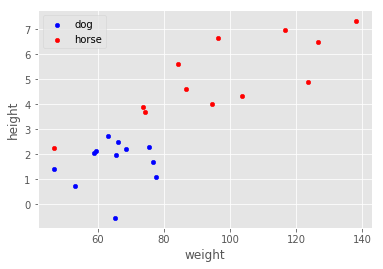

In [18]:
ax = df[df['animal']=='dog'].plot.scatter('weight','height', color='blue', label='dog')
df[df['animal']=='horse'].plot.scatter('weight','height', color='red', label='horse', ax=ax)
plt.legend();

In [19]:
df[(df['color']=='white')]

,color,height,weight,animal
3,white,5.621873,84.139520,horse
6,white,-0.537184,65.110658,dog
8,white,0.726663,52.927190,dog
11,white,2.288010,75.289859,dog
20,white,2.215331,68.325454,dog
23,white,1.683211,76.579886,dog


In [20]:
df[(df['animal']=='horse')]

,color,height,weight,animal
1,brown,2.234386,46.541458,horse
3,white,5.621873,84.139520,horse
5,black,4.618539,86.726109,horse
9,black,6.971577,116.575449,horse
10,brown,4.316814,103.697708,horse
12,black,4.915971,123.434038,horse
13,brown,3.890863,73.587133,horse
14,brown,7.333062,138.228909,horse
15,black,4.030712,94.478316,horse
17,brown,3.697125,74.212135,horse
